# **Thu thập dữ liệu**

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = "32d1acaa4b2f4e5495c160301241507"
LOCATION = "Quang Ngai"  # Có thể thay đổi thành tên thành phố hoặc tọa độ

# Hàm lấy dữ liệu thời tiết
def get_weather_data(date):
    url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={LOCATION}&dt={date}"
    response = requests.get(url)
    return response.json()

# Lấy dữ liệu cho 7 ngày gần nhất
end_date = datetime.now()
start_date = end_date - timedelta(days=200)

data = []
current_date = start_date
while current_date <= end_date:
    date_str = current_date.strftime("%Y-%m-%d")
    weather_data = get_weather_data(date_str)

    # Trích xuất thông tin cần thiết
    day_data = weather_data['forecast']['forecastday'][0]['day']
    data.append({
        'date': date_str,
        'max_temp': day_data['maxtemp_c'],
        'min_temp': day_data['mintemp_c'],
        'avg_temp': day_data['avgtemp_c'],
        'max_wind_kph': day_data['maxwind_kph'],
        'total_precip_mm': day_data['totalprecip_mm'],
        'avg_humidity': day_data['avghumidity']
    })

    current_date += timedelta(days=1)

# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data)

# In dữ liệu để kiểm tra
print(df)

# Lưu dữ liệu vào file CSV (tùy chọn)
df.to_csv('weather_data.csv', index=False)

           date  max_temp  min_temp  avg_temp  max_wind_kph  total_precip_mm  \
0    2024-04-07      35.1      22.8      27.5          25.9             0.00   
1    2024-04-08      34.1      23.0      27.2          19.4             0.00   
2    2024-04-09      31.7      21.6      25.6          18.0             0.00   
3    2024-04-10      32.3      20.8      26.0          17.3             0.00   
4    2024-04-11      32.8      21.2      26.3          17.6             0.00   
..          ...       ...       ...       ...           ...              ...   
96   2024-07-12      36.0      24.5      28.6          19.8             8.71   
97   2024-07-13      34.7      24.2      28.4          15.8             3.58   
98   2024-07-14      27.9      24.2      25.2          16.2            14.06   
99   2024-07-15      29.1      23.1      25.0          12.2            13.21   
100  2024-07-16      31.6      23.0      26.5          12.2             6.01   

     avg_humidity  
0              71  

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Xác thực với Google Sheets
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('/content/gen-lang-client-0329194995-276f1b6493c3.json', scope)
client = gspread.authorize(creds)

# Mở Google Sheet
sheet = client.open('Weather Data').sheet1

# Chuyển đổi DataFrame thành list để đưa vào Google Sheets
values = [df.columns.values.tolist()] + df.values.tolist()

# Cập nhật Google Sheet
sheet.clear()
sheet.update('A1', values)

<ipython-input-29-c40e3a3f827d>:17: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  sheet.update('A1', values)


{'spreadsheetId': '1dM5a7wv4-f1tkxu2LusFlH89MdKg2DiAICtEx-p1zOE',
 'updatedRange': 'Sheet1!A1:G92',
 'updatedRows': 92,
 'updatedColumns': 7,
 'updatedCells': 644}

# **Phân tích dữ liệu**

         date  max_temp  min_temp  avg_temp  max_wind_kph  total_precip_mm  \
0  2024-04-07      35.1      22.8      27.5          25.9              0.0   
1  2024-04-08      34.1      23.0      27.2          19.4              0.0   
2  2024-04-09      31.7      21.6      25.6          18.0              0.0   
3  2024-04-10      32.3      20.8      26.0          17.3              0.0   
4  2024-04-11      32.8      21.2      26.3          17.6              0.0   

   avg_humidity  
0            71  
1            76  
2            74  
3            73  
4            73  
         max_temp    min_temp    avg_temp  max_wind_kph  total_precip_mm  \
count  101.000000  101.000000  101.000000    101.000000       101.000000   
mean    35.132673   24.349505   28.538614     19.087129         4.048119   
std      2.538626    1.350602    1.354841      4.920644         6.690171   
min     27.900000   20.200000   25.000000      7.200000         0.000000   
25%     34.100000   23.900000   27.700000  

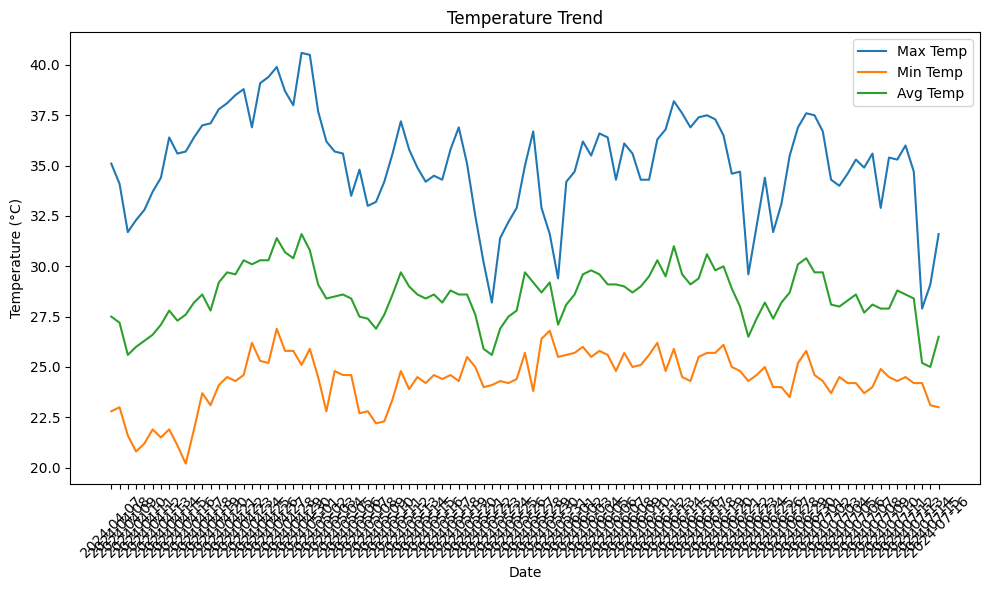

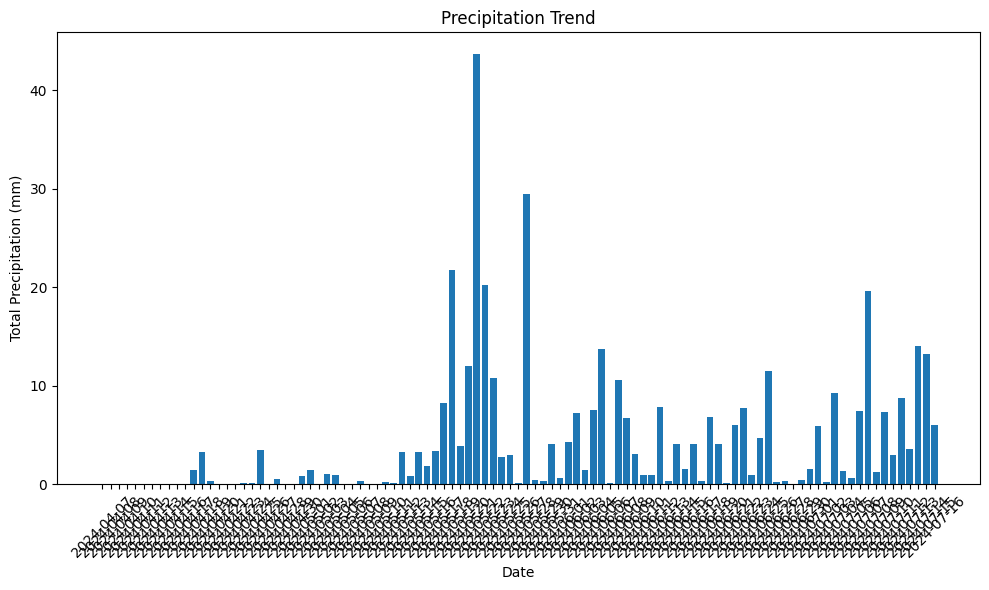

Average Maximum Temperature: 35.13 °C
Average Minimum Temperature: 24.35 °C
Average Total Precipitation: 4.05 mm


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/weather_data.csv')

# Hiển thị một số thông tin cơ bản về dữ liệu
print(df.head())
print(df.describe())

# Vẽ biểu đồ nhiệt độ theo thời gian
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['max_temp'], label='Max Temp')
plt.plot(df['date'], df['min_temp'], label='Min Temp')
plt.plot(df['date'], df['avg_temp'], label='Avg Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ lượng mưa theo thời gian
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['total_precip_mm'])
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.title('Precipitation Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tính toán và hiển thị các thông tin thống kê khác (ví dụ: nhiệt độ trung bình, lượng mưa trung bình, ...)
average_max_temp = df['max_temp'].mean()
average_min_temp = df['min_temp'].mean()
average_precip = df['total_precip_mm'].mean()

print(f"Average Maximum Temperature: {average_max_temp:.2f} °C")
print(f"Average Minimum Temperature: {average_min_temp:.2f} °C")
print(f"Average Total Precipitation: {average_precip:.2f} mm")

# Thực hiện các phân tích khác tùy thuộc vào mục tiêu của bạn (ví dụ: tìm kiếm mối tương quan giữa các biến, dự đoán thời tiết, ...)


# **Dự đoán**

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Chuẩn bị dữ liệu cho mô hình dự đoán
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear  # Thêm cột ngày trong năm để làm đặc trưng

# Chọn các đặc trưng và biến mục tiêu
features = ['day_of_year']
target = 'avg_temp'  # Dự đoán nhiệt độ trung bình

X = df[features]
y = df[target]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Dự đoán cho các ngày tiếp theo (ví dụ: 7 ngày)
future_dates = [end_date + timedelta(days=i) for i in range(1, 30)]
future_days_of_year = [date.timetuple().tm_yday for date in future_dates]
future_df = pd.DataFrame({'day_of_year': future_days_of_year})

future_predictions = model.predict(future_df)

# Hiển thị kết quả dự đoán
for date, prediction in zip(future_dates, future_predictions):
    print(f"Predicted average temperature for {date.strftime('%Y-%m-%d')}: {prediction:.2f} °C")

Mean Squared Error: 1.9354490083364035
Predicted average temperature for 2024-07-17: 28.53 °C
Predicted average temperature for 2024-07-18: 28.53 °C
Predicted average temperature for 2024-07-19: 28.53 °C
Predicted average temperature for 2024-07-20: 28.53 °C
Predicted average temperature for 2024-07-21: 28.52 °C
Predicted average temperature for 2024-07-22: 28.52 °C
Predicted average temperature for 2024-07-23: 28.52 °C
Predicted average temperature for 2024-07-24: 28.52 °C
Predicted average temperature for 2024-07-25: 28.52 °C
Predicted average temperature for 2024-07-26: 28.51 °C
Predicted average temperature for 2024-07-27: 28.51 °C
Predicted average temperature for 2024-07-28: 28.51 °C
Predicted average temperature for 2024-07-29: 28.51 °C
Predicted average temperature for 2024-07-30: 28.51 °C
Predicted average temperature for 2024-07-31: 28.50 °C
Predicted average temperature for 2024-08-01: 28.50 °C
Predicted average temperature for 2024-08-02: 28.50 °C
Predicted average temperat

# **Vẽ biểu đồ dự đoán**

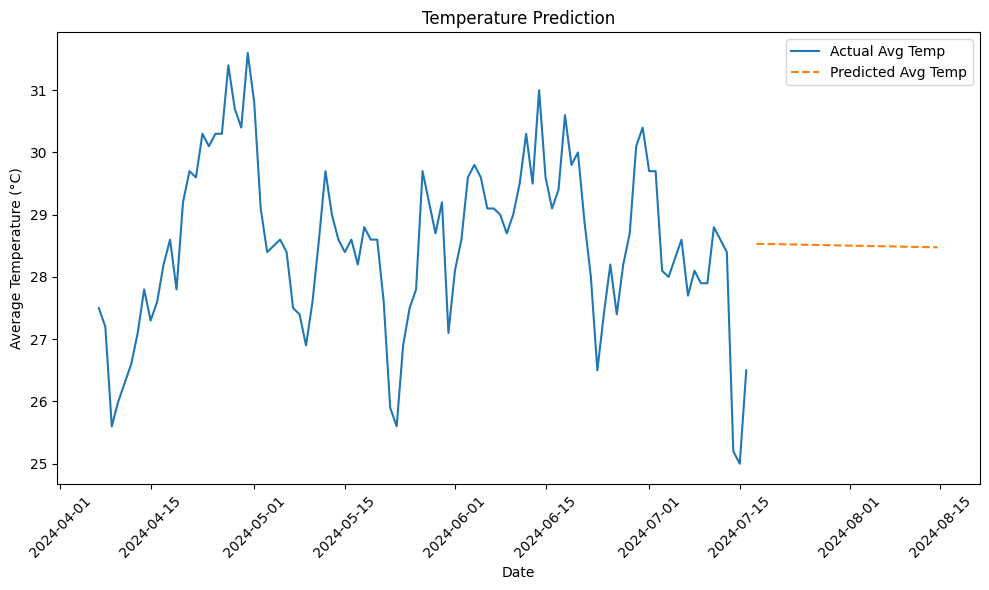

In [ ]:

# Vẽ biểu đồ dự đoán
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['avg_temp'], label='Actual Avg Temp')
plt.plot(future_dates, future_predictions, label='Predicted Avg Temp', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Train Data và tạo file model cho dự đoán

import joblib

model = LinearRegression()
model.fit(X_train, y_train)

# Lưu mô hình vào file
joblib.dump(model, 'temperature_prediction_model.pkl')
print("Model saved to temperature_prediction_model.pkl")


Model saved to temperature_prediction_model.pkl


In [ ]:

import joblib
import pandas as pd
from datetime import datetime, timedelta

# Load the saved model
model = joblib.load('/content/temperature_prediction_model.pkl')

# Prepare test data (example for the next 7 days)
end_date = datetime.now()
future_dates = [end_date + timedelta(days=i) for i in range(1, 8)]
future_days_of_year = [date.timetuple().tm_yday for date in future_dates]
future_df = pd.DataFrame({'day_of_year': future_days_of_year})

# Make predictions
future_predictions = model.predict(future_df)

# Display the predictions
for date, prediction in zip(future_dates, future_predictions):
    print(f"Predicted average temperature for {date.strftime('%Y-%m-%d')}: {prediction:.2f} °C")


Predicted average temperature for 2024-07-17: 28.53 °C
Predicted average temperature for 2024-07-18: 28.53 °C
Predicted average temperature for 2024-07-19: 28.53 °C
Predicted average temperature for 2024-07-20: 28.53 °C
Predicted average temperature for 2024-07-21: 28.52 °C
Predicted average temperature for 2024-07-22: 28.52 °C
Predicted average temperature for 2024-07-23: 28.52 °C
